In [27]:
# Este entorno de Python 3 viene con muchas bibliotecas analíticas instaladas
# Está definido por la imagen Docker de kaggle/python: https://github.com/kaggle/docker-python
# Por ejemplo, aquí hay algunos paquetes útiles que podemos cargar

import numpy as np  # álgebra lineal
import pandas as pd  # procesamiento de datos, entrada/salida de archivos CSV (por ejemplo, pd.read_csv)

# Configuramos los datos iniciales leyendo los archivos CSV de entrenamiento y prueba
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Calculamos el tamaño de los datasets de entrenamiento y prueba
train_df_len = len(train_df)
print(train_df_len)  # 8693 registros en el dataset de entrenamiento

test_df_len = len(test_df)
print(test_df_len)  # 4277 registros en el dataset de prueba

# Función para combinar los datasets de entrenamiento y prueba
def combine_df(train_df, test_df):
    combined_df = pd.concat([train_df, test_df], ignore_index=True)  # Concatenamos los datasets ignorando el índice
    return combined_df

# Función para separar nuevamente los datasets de entrenamiento y prueba
def separate_df(combined_df, train_df_len, test_df_len):
    train_df = combined_df.iloc[:train_df_len]  # Tomamos los datos de entrenamiento desde el inicio hasta la longitud del dataset de entrenamiento
    test_df = combined_df.iloc[train_df_len:train_df_len + test_df_len]  # Tomamos los datos de prueba después de los de entrenamiento
    return train_df, test_df

# Combinamos los datasets
full_df = combine_df(train_df, test_df)
print(len(full_df))  # 12970 registros combinados en total
print(full_df.head())  # Mostramos las primeras filas del dataset combinado

8693
4277
12970
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported  
0       False  
1        True  
2       False  
3       False  
4       

In [28]:
full_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


Sabemos que las personas en CryoSleep (sueño criogénico) no gastarán dinero ni comprarán el servicio VIP.

Si hay valores NaN para las personas en CryoSleep en esas categorías, podemos reemplazarlos por los valores que sabemos que tienen.

In [29]:
# Listar las columnas que queremos cambiar
zero_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
false_columns = ['VIP']

# La condición se cumple si la persona está en CryoSleep
condition = (full_df['CryoSleep'] == True)

# Ubicar todas las filas con esta condición y completar los valores para lo que sabemos que son
full_df.loc[~condition, zero_columns] = full_df.loc[~condition, zero_columns].fillna(0)
full_df.loc[~condition, false_columns] = full_df.loc[~condition, false_columns].fillna(False)

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_93605/4241814168.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_df.loc[~condition, false_columns] = full_df.loc[~condition, false_columns].fillna(False)


Si sabemos que las personas que están en CryoSleep no están gastando dinero, entonces sabemos que cualquiera que tenga NaN en CryoSleep, pero está gastando dinero, probablemente no esté en CryoSleep, por lo que vamos a completar estos valores también.

In [30]:
zero_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cryosleep_column = ['CryoSleep']

# La condición es si todas las columnas de dinero son iguales a cero
condition = (full_df[zero_columns].eq(0).all(axis=1))

# Completar los valores NaN de CryoSleep como True si se cumple la condición
full_df.loc[~condition, cryosleep_column] = full_df.loc[~condition, cryosleep_column].fillna(True)

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_93605/2973593368.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_df.loc[~condition, cryosleep_column] = full_df.loc[~condition, cryosleep_column].fillna(True)


Ahora que hemos hecho esto, los únicos valores que deberían quedar en CryoSleep son para personas que no están en CryoSleep, por lo que completaremos el resto de las columnas como False.

In [31]:
full_df['CryoSleep'].fillna(False, inplace=True)

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_93605/2329576505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['CryoSleep'].fillna(False, inplace=True)
/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_93605/2329576505.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_df

In [32]:
full_df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep          0
Cabin            299
Destination      274
Age              270
VIP              104
RoomService       93
FoodCourt        109
ShoppingMall     131
Spa              107
VRDeck            91
Name             294
Transported     4277
dtype: int64

Ahora que hay menos valores faltantes que antes, deberíamos intentar obtener una visualización del resto de los valores faltantes.

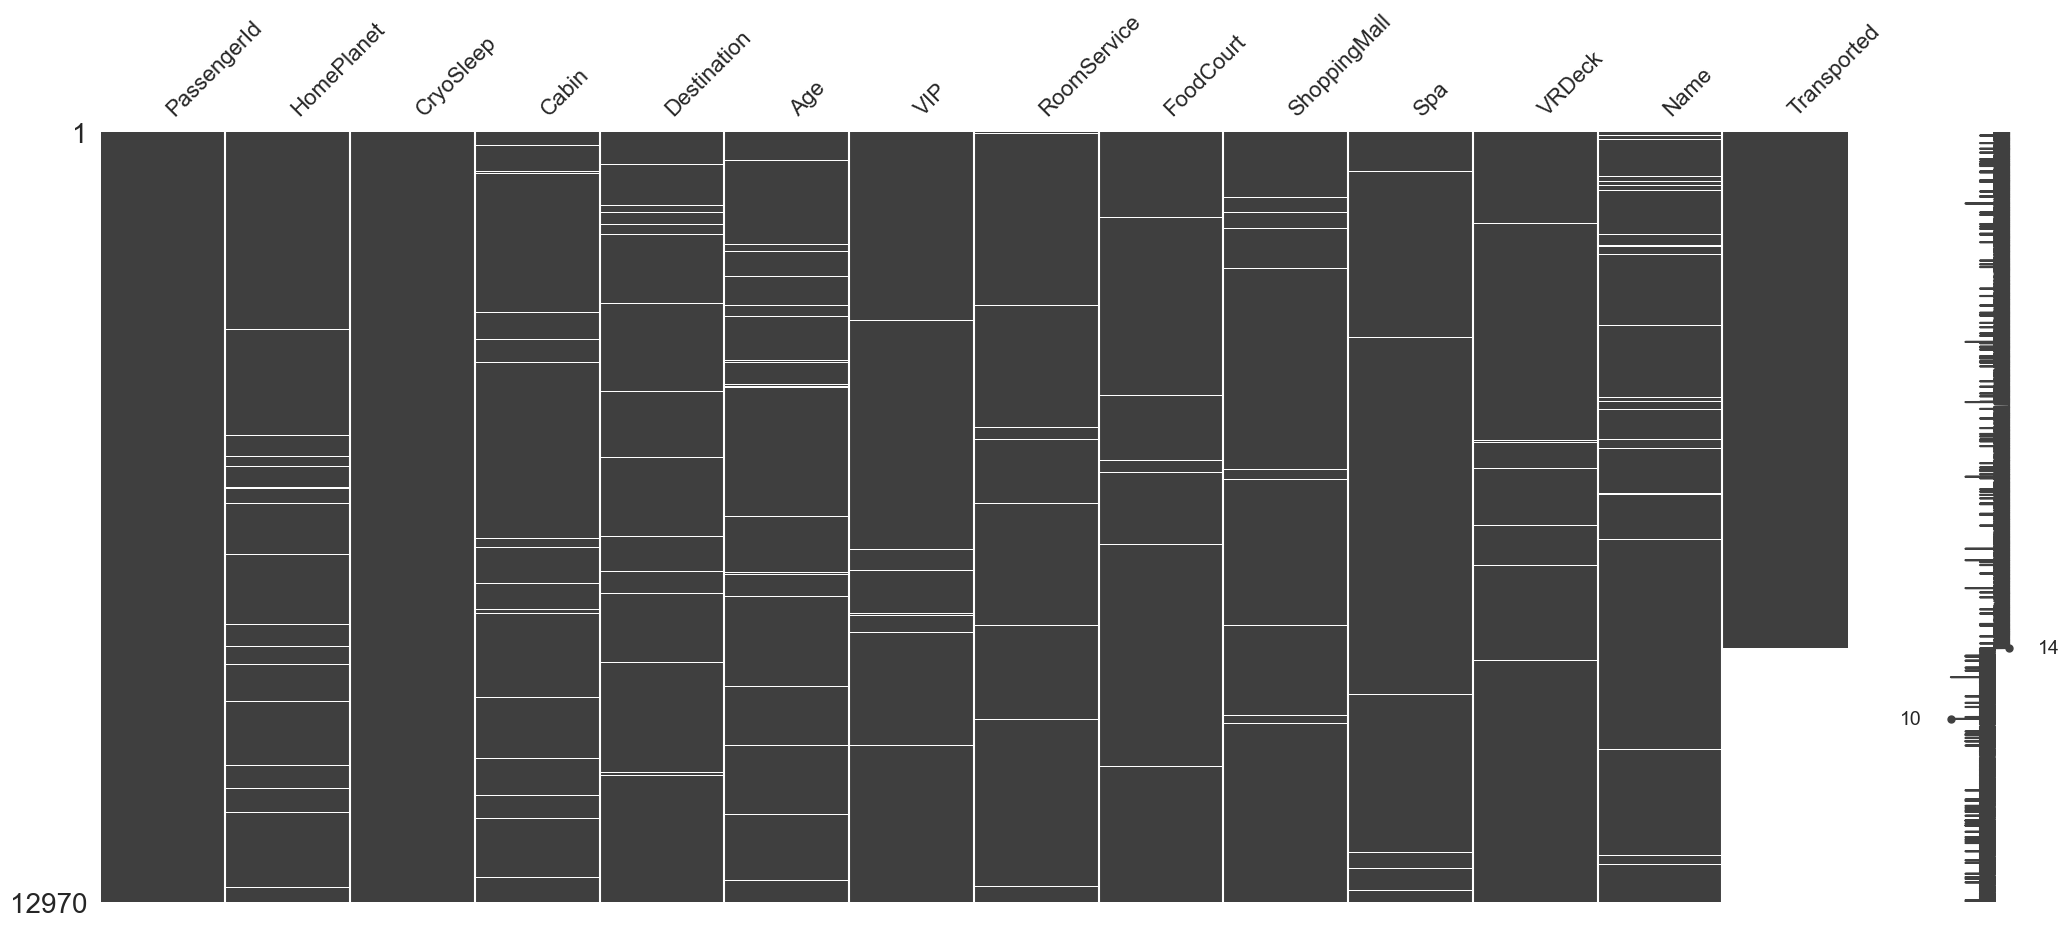

<Figure size 1500x900 with 0 Axes>

In [33]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(full_df)
plt.figure(figsize=(15, 9))
plt.show()

La columna Transported tiene sentido porque el conjunto de prueba no tiene la columna Transported.

<Axes: >

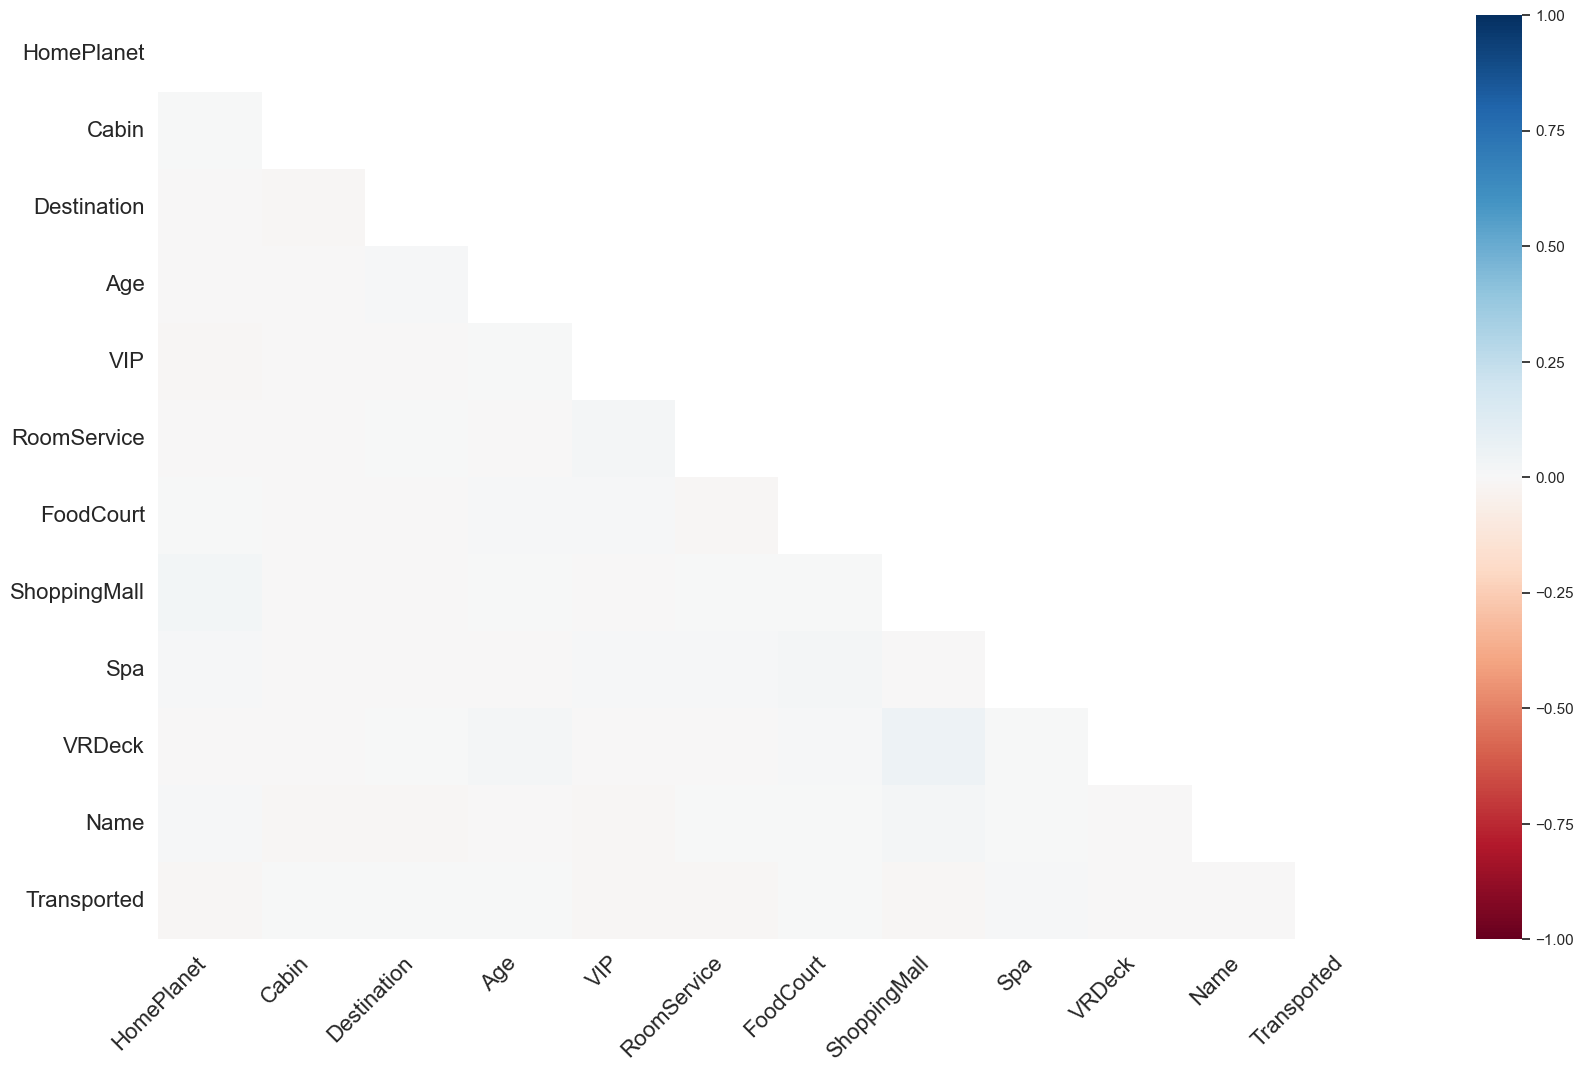

In [34]:
# Parece que los valores faltantes están bastante distribuidos en los datos.
# Vamos a echar un vistazo más detallado
msno.heatmap(full_df, labels=True)

El resto de estos bloques de código son solo para visualización de datos, podemos manipular las columnas para ver qué interacciones interesantes tienen.

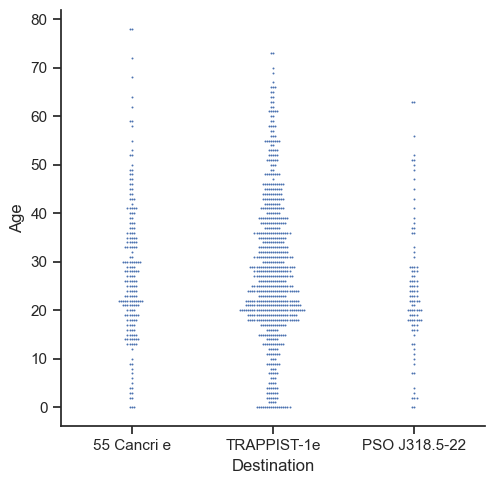

In [35]:
import seaborn as sns
sample_df = full_df.sample(n=1000)

# La edad no tiene efecto en ser transportado
# Las personas que gastaron más en servicio de habitación tenían menos probabilidades de ser transportadas
# Las personas mayores tenían menos probabilidades de usar CryoSleep
# No hay muchos VIP, pero los que lo eran no tenían menos de 20 años
# Los europeos eran generalmente mayores que los terrestres, la mayoría de los marcianos estaban distribuidos equitativamente
# Los europeos gastaron más en servicio de habitación debido a valores atípicos, los terrestres gastaron menos en servicio de habitación, mientras que los marcianos gastaron más en general
# Esta métrica parece persistir en todos los datos
# La mayoría de las personas iban a TRAPPIST, mientras que las menos iban a J318

sns.set(style='ticks')
sns.catplot(x='Destination', y='Age', kind='swarm', data=sample_df, s=2)
plt.show()

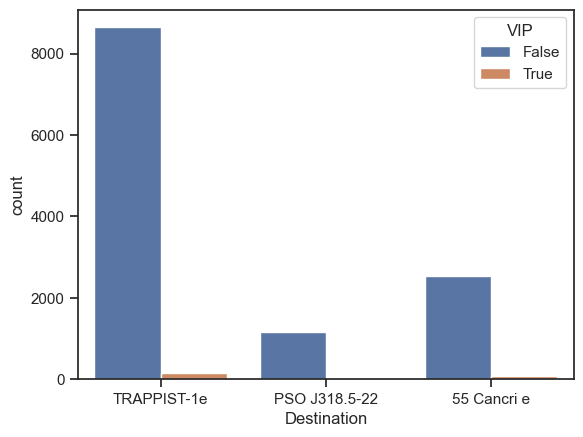

In [36]:
sns.countplot(x='Destination', hue='VIP', data=full_df)
plt.show()

# Nadie eligió VIP si estaban en CryoSleep, así que cualquier persona con VIP debería tener CryoSleep completado como falso
# La mayoría de los terrestres iban a Trappist, así que simplemente rellena tanto para la Tierra como para Marte con Trappist
# Europa está mitad y mitad entre Trappist y 55 Cancri e, quizás rellena la mitad con cada uno, de lo contrario, déjalo así


La columna de la cabina tiene detalles muy importantes que pasarán desapercibidos si no manipulamos la columna dividiéndola en más columnas. Vamos a dividir la columna en sus partes respectivas para facilitarnos el trabajo.

In [37]:
# Primero, separemos los datos de la columna de cabina en sus respectivas partes
cabin_split = full_df['Cabin'].str.split('/', expand=True)
cabin_split.columns = ['Deck', 'Room_Number', 'Side']
new_df = pd.concat([full_df, cabin_split], axis=1)
full_df = new_df
full_df.drop(columns=['Cabin'], inplace=True)
full_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room_Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


Necesitaremos imputar la columna de edad en algún momento para manejar los valores faltantes. Dado que esta columna es probablemente bastante importante, deberíamos tener cuidado con cómo la imputamos. Voy a rellenar la columna de edad basándome en las edades promedio de las personas agrupadas por HomePlanet y si están o no en CryoSleep.

In [38]:
group_means = full_df.groupby(['HomePlanet', 'CryoSleep'])['Age'].mean()
print(group_means)

HomePlanet  CryoSleep
Earth       False        27.056735
            True         23.575071
Europa      False        35.488731
            True         32.929037
Mars        False        29.800888
            True         28.934426
Name: Age, dtype: float64


In [39]:
# Rellenar los valores NaN para la Edad
group_means = full_df.groupby(['HomePlanet', 'CryoSleep'], group_keys=True)['Age'].mean().reset_index(name='Age_mean')
full_df = full_df.merge(group_means, on=['HomePlanet', 'CryoSleep'], how='left')
full_df['Age'] = full_df['Age'].fillna(full_df['Age_mean'])
full_df.drop(columns=['Age_mean'], inplace=True)

In [40]:
full_df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep          0
Destination      274
Age                5
VIP              104
RoomService       93
FoodCourt        109
ShoppingMall     131
Spa              107
VRDeck            91
Name             294
Transported     4277
Deck             299
Room_Number      299
Side             299
dtype: int64

Los NaN se ven mucho mejor de lo que estaban, así que continuemos con el resto del procesamiento de datos y luego con los modelos.

In [41]:
# Ahora podemos continuar con la imputación/preprocesamiento
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Especificar características numéricas y categóricas
numerical_features = ['Room_Number', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# Crear pipelines de preprocesamiento para características numéricas y categóricas
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar pipelines usando ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

Vamos a continuar con los siguientes pasos de separar los DF de nuevo en lo que se supone que deben ser, y luego comenzaremos el entrenamiento de nuestros modelos. Ajustamos los parámetros para obtener los mejores

In [42]:
# Separar el DF de nuevo en los respectivos DF's
train_df, test_df = separate_df(full_df, train_df_len, test_df_len)

# Configurar el objetivo (target)
y = train_df['Transported']

# Sacar el objetivo de los conjuntos de entrenamiento y prueba
train_df.drop(columns=['Transported'], inplace=True)
test_df.drop(columns=['Transported'], inplace=True)

# Y necesita ser cambiado a valores binarios reales en lugar de cadenas
y = y.astype(bool)
y.head()

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_93605/2166745563.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=['Transported'], inplace=True)
/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_93605/2166745563.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=['Transported'], inplace=True)


0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

Ahora vamos a transformar nuestros datos para que estén en el formato que los modelos de ML necesitarán para predecir con nuestros datos. Esto significa aplicar One Hot Encoding a las características categóricas y escalar nuestras características numéricas.

In [43]:
# Necesitamos esto para más adelante
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
SEED = 42

# Forma (shape) antes de la transformación
print('Forma de X_train: {}'.format(train_df.shape))
print('Forma de y_train: {}'.format(y.shape))
print('Forma de X_test: {}'.format(test_df.shape))

Forma de X_train: (8693, 15)
Forma de y_train: (8693,)
Forma de X_test: (4277, 15)


In [44]:
# Ajustar los datos al preprocesador y limpiar los datos, renombrar las columnas a los nombres correctos después
transformed_data_train = preprocessor.fit_transform(train_df)
transformed_data_test = preprocessor.transform(test_df)

feature_names = preprocessor.named_transformers_['categorical'] \
    .named_steps['encoder'].get_feature_names_out(input_features=categorical_features) 

all_feature_names = numerical_features + list(feature_names)

In [45]:
# Convierte los datos en dataframes
transformed_train_df = pd.DataFrame(transformed_data_train, columns=all_feature_names)
transformed_test_df = pd.DataFrame(transformed_data_test, columns=all_feature_names)

In [46]:
# Comprobación de los datos transformados para asegurarse de que el conjunto de entrenamiento y prueba tienen el mismo número de categorías
print('X_train shape: {}'.format(transformed_train_df.shape))
print('y_train shape: {}'.format(y.shape))
print('X_test shape: {}'.format(transformed_test_df.shape))

X_train shape: (8693, 27)
y_train shape: (8693,)
X_test shape: (4277, 27)


Ahora pasamos a la selección de modelos. Para este modelo ensemble, usaremos un modelo Random Forest junto con un Classificador Gradient Boosting. Estos modelos funcionan bien juntos, y sus predicciones se combinarán usando un modelo de Regresión Logística para obtener mejores resultados en general.

In [47]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Mejor modelo en general, funcionó mejor con menos sobreajuste
#forest_model = RandomForestClassifier(criterion='gini', n_estimators=70, max_depth=5, min_samples_split=2, min_samples_leaf=2,
#                                       max_features='sqrt', random_state=SEED)

# Primer modelo GBM
gbm_model_1 = GradientBoostingClassifier(n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=5, random_state=SEED, 
                                        min_samples_split=2, min_samples_leaf=3, loss='exponential', subsample=0.5)

# Segundo modelo GBM
gbm_model_2 = GradientBoostingClassifier(n_estimators=70, learning_rate=0.1, max_features='log2', max_depth=5, random_state=SEED, 
                                        min_samples_split=2, min_samples_leaf=3, subsample=0.5, loss='log_loss')

# Tercer modelo GBM
gbm_model_3 = GradientBoostingClassifier(n_estimators=70, learning_rate=0.1, max_features='log2', max_depth=5, random_state=SEED, 
                                        min_samples_split=2, min_samples_leaf=3, subsample=0.5, loss='exponential')

Ahora necesitamos dividir nuestros datos de entrenamiento en un conjunto de entrenamiento y uno de validación. Esto es porque vamos a probar cómo interactúan nuestros modelos ensemble antes de implementarlos. Siempre podemos probar cada modelo por separado para obtener una puntuación general, pero los dos modelos pueden interactuar de manera diferente cuando se combinan. Se puede manipular esta sección para llegar al resultado final. Solo hay que asegurarse de ejecutar todas las celdas, ya que algunas contienen datos importantes para entrenar todos los modelos.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(transformed_train_df, y, test_size=0.2, random_state=SEED)

In [49]:
from sklearn.metrics import accuracy_score

# Ajustar ambos modelos
gbm_model_1.fit(X_train, y_train)
gbm_model_2.fit(X_train, y_train)
gbm_model_3.fit(X_train, y_train)

# Realizar predicciones iniciales para entrenar la Regresión Logística en la predicción
gbm_1_predictions = gbm_model_1.predict(X_test)
gbm_2_predictions = gbm_model_2.predict(X_test)
gbm_3_predictions = gbm_model_3.predict(X_test)

# Apilar ambas predicciones para formar un conjunto de entrenamiento para la Regresión Logística
stacked_features = np.column_stack((gbm_1_predictions, gbm_2_predictions, gbm_3_predictions))

# Ajustar el modelo meta a las características apiladas
meta_model = LogisticRegression()
meta_model.fit(stacked_features, y_test)

# Realizar predicciones nuevamente para obtener una nueva métrica
gbm_1_base_preds = gbm_model_1.predict(X_test)
gbm_2_base_preds = gbm_model_2.predict(X_test)
gbm_3_base_preds = gbm_model_3.predict(X_test)

# Apilar nuevamente ambas predicciones
stacked_base_preds = np.column_stack((gbm_1_base_preds, gbm_2_base_preds, gbm_3_base_preds))

# Obtener las predicciones finales para evaluar el rendimiento general
ensemble_predictions = meta_model.predict(stacked_base_preds)

# Evaluar las predicciones y mostrarlas
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Precisión del Ensemble:", ensemble_accuracy)

Precisión del Ensemble: 0.8056354226566993


Ahora usemos este modelo en el test final, y enviémoslo.

In [50]:
# Obtener nuevas predicciones base para el conjunto de prueba real
gbm_1_base_preds = gbm_model_1.predict(transformed_test_df)
gbm_2_base_preds = gbm_model_2.predict(transformed_test_df)
gbm_3_base_preds = gbm_model_3.predict(transformed_test_df)

# Combinar ambas predicciones para que el meta-modelo prediga
stacked_base_preds = np.column_stack((gbm_1_base_preds, gbm_2_base_preds, gbm_3_base_preds))

In [51]:
# Predecir el resultado final
ensemble_predictions = meta_model.predict(stacked_base_preds)

In [52]:
output = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Transported' : ensemble_predictions
})
output.to_csv('submission.csv', index=False)
print('Envío guardado')

Envío guardado
